In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For Reviewer
After you run this next cell, enter how many trials you ran. 

In [2]:
group9_trials = 10
reviewer_trials = int(input("How many trials did you run? "))

How many trials did you run? 7


##  Start of Data Analysis

In [3]:
qdiscs = ['noqueue','codel','red','fq_codel','pie']
transports = ['tcp','udp']
high_bandwidths = [1.0, 2.5, 5.0, 10.0]

# isReviewer: boolean allowing us to get data from respective folder 
def create_output_filenames(num_trials, isReviewer):
    
    output_files = []
    # Careful ordering of for-loops to guarantee splitting data by bandwidth is correct
    for bandwidth in high_bandwidths:
        for qdisc in qdiscs:
            for transport in transports:
                for i in range(1, num_trials+1):
                    filename = ""
                    if isReviewer:
                        filename = './server_outputs/'
                    else:
                        filename = './group9_outputs/'
                    filename += qdisc + "-" + transport + "-" + str(bandwidth) + "-" + str(i) + ".output"
                    output_files.append(filename)
    
    return output_files

In [4]:
# Parse output files to get delay and bitrate data
def parse_output(filename):
    
    avg_delays = []
    avg_bitrates = []
    
    output_file = open(filename)
    
    for line in output_file:

        if "Average delay" in line:
            data = line.split()
            avg_delays.append(float(data[3]))
        elif "Average bitrate" in line:
            data = line.split()
            bitrate = float(data[3])
            if data[4] == 'Kbit/s':
                avg_bitrates.append(bitrate * 1e3)
            elif data[4] == 'Mbit/s':
                avg_bitrates.append(bitrate * 1e6)
            else:
                print("Error in bitrate units\n")
        else:
            continue
        
    return avg_delays, avg_bitrates

In [5]:
group9_output_files = create_output_filenames(group9_trials, False)

In [6]:
# Organize data into respective lists
def parse_ditg_results(output_files):
    
    delay_data_noqueue_tcp = []
    delay_data_noqueue_udp = []
    delay_data_codel_tcp = []
    delay_data_codel_udp = []
    delay_data_red_tcp = []
    delay_data_red_udp = []
    delay_data_fq_codel_tcp = []
    delay_data_fq_codel_udp = []
    delay_data_pie_tcp = []
    delay_data_pie_udp = []
    bitrate_data_noqueue_tcp = []
    bitrate_data_noqueue_udp = []
    bitrate_data_codel_tcp = []
    bitrate_data_codel_udp = []
    bitrate_data_red_tcp = []
    bitrate_data_red_udp = []
    bitrate_data_fq_codel_tcp = []
    bitrate_data_fq_codel_udp = []
    bitrate_data_pie_tcp = []
    bitrate_data_pie_udp = []

    for f in output_files:

        delays, bitrates = parse_output(f)
        total_avg_delay = delays[3]
        total_avg_bitrate = bitrates[3]

        if "noqueue" in f:
            if "tcp" in f:
                delay_data_noqueue_tcp.append(total_avg_delay)
                bitrate_data_noqueue_tcp.append(total_avg_bitrate)
            elif "udp" in f:
                delay_data_noqueue_udp.append(total_avg_delay)
                bitrate_data_noqueue_udp.append(total_avg_bitrate)
        elif "fq_codel" in f:
            if "tcp" in f:
                delay_data_fq_codel_tcp.append(total_avg_delay)
                bitrate_data_fq_codel_tcp.append(total_avg_bitrate)
            elif "udp" in f:
                delay_data_fq_codel_udp.append(total_avg_delay)
                bitrate_data_fq_codel_udp.append(total_avg_bitrate)
        elif "red" in f:
            if "tcp" in f:
                delay_data_red_tcp.append(total_avg_delay)
                bitrate_data_red_tcp.append(total_avg_bitrate)
            elif "udp" in f:
                delay_data_red_udp.append(total_avg_delay)
                bitrate_data_red_udp.append(total_avg_bitrate)
        elif "codel" in f:
            if "tcp" in f:
                delay_data_codel_tcp.append(total_avg_delay)
                bitrate_data_codel_tcp.append(total_avg_bitrate)
            elif "udp" in f:
                delay_data_codel_udp.append(total_avg_delay)
                bitrate_data_codel_udp.append(total_avg_bitrate)
        elif "pie" in f:
            if "tcp" in f:
                delay_data_pie_tcp.append(total_avg_delay)
                bitrate_data_pie_tcp.append(total_avg_bitrate)
            elif "udp" in f:
                delay_data_pie_udp.append(total_avg_delay)
                bitrate_data_pie_udp.append(total_avg_bitrate)
        else:
            print("Error: unknown qdisc in file name")

    return delay_data_noqueue_tcp, delay_data_noqueue_udp, delay_data_codel_tcp, delay_data_codel_udp,\
        delay_data_red_tcp, delay_data_red_udp, delay_data_fq_codel_tcp, delay_data_fq_codel_udp,\
        delay_data_pie_tcp, delay_data_pie_udp, bitrate_data_noqueue_tcp, bitrate_data_noqueue_udp,\
        bitrate_data_codel_tcp, bitrate_data_codel_udp, bitrate_data_red_tcp, bitrate_data_red_udp,\
        bitrate_data_fq_codel_tcp, bitrate_data_fq_codel_udp, bitrate_data_pie_tcp, bitrate_data_pie_udp

In [7]:
all_delay_data_noqueue_tcp, all_delay_data_noqueue_udp, all_delay_data_codel_tcp, all_delay_data_codel_udp,\
all_delay_data_red_tcp, all_delay_data_red_udp, all_delay_data_fq_codel_tcp, all_delay_data_fq_codel_udp,\
all_delay_data_pie_tcp, all_delay_data_pie_udp, all_bitrate_data_noqueue_tcp, all_bitrate_data_noqueue_udp,\
all_bitrate_data_codel_tcp, all_bitrate_data_codel_udp, all_bitrate_data_red_tcp, all_bitrate_data_red_udp,\
all_bitrate_data_fq_codel_tcp, all_bitrate_data_fq_codel_udp, all_bitrate_data_pie_tcp,\
all_bitrate_data_pie_udp = parse_ditg_results(group9_output_files)

# Replace Bitrate with Link Utilization

In [8]:
bandwidths = [0.1, 0.25, 0.5, 1.0]

def convert_bitrate_to_linkutil(bitrate_data, num_trials):

    num_datapts = num_trials * len(bandwidths)
    Q1_index = num_datapts//4
    Q2_index = 2*num_datapts//4
    Q3_index = 3*num_datapts//4
    to_return = [val / (bandwidths[0]*1e6) * 100 for val in bitrate_data[:Q1_index]]
    to_return.extend([val / (bandwidths[1]*1e6) * 100 for val in bitrate_data[Q1_index:Q2_index]])
    to_return.extend([val / (bandwidths[2]*1e6) * 100 for val in bitrate_data[Q2_index:Q3_index]])
    to_return.extend([val / (bandwidths[3]*1e6) * 100 for val in bitrate_data[Q3_index:]])
    return to_return

In [9]:
all_linkutil_data_noqueue_tcp = convert_bitrate_to_linkutil(all_bitrate_data_noqueue_tcp, group9_trials)
all_linkutil_data_noqueue_udp = convert_bitrate_to_linkutil(all_bitrate_data_noqueue_udp, group9_trials)
all_linkutil_data_codel_tcp = convert_bitrate_to_linkutil(all_bitrate_data_codel_tcp, group9_trials)
all_linkutil_data_codel_udp = convert_bitrate_to_linkutil(all_bitrate_data_codel_udp, group9_trials)
all_linkutil_data_red_tcp = convert_bitrate_to_linkutil(all_bitrate_data_red_tcp, group9_trials)
all_linkutil_data_red_udp = convert_bitrate_to_linkutil(all_bitrate_data_red_udp, group9_trials)
all_linkutil_data_fq_codel_tcp = convert_bitrate_to_linkutil(all_bitrate_data_fq_codel_tcp, group9_trials)
all_linkutil_data_fq_codel_udp = convert_bitrate_to_linkutil(all_bitrate_data_fq_codel_udp, group9_trials)
all_linkutil_data_pie_tcp = convert_bitrate_to_linkutil(all_bitrate_data_pie_tcp, group9_trials)
all_linkutil_data_pie_udp = convert_bitrate_to_linkutil(all_bitrate_data_pie_udp, group9_trials)

In [10]:
def split_data(noqueue_data, codel_data, red_data, fq_codel_data, pie_data, num_trials):
    
    all_data = np.zeros((5), dtype=object)
    input_list = [noqueue_data, codel_data, red_data, fq_codel_data, pie_data]
    
    bandwidths = [0.1, 0.25, 0.5, 1.0]
    # Use these to split up data into four evenly-sized chunks for plots
    num_datapts = num_trials * len(bandwidths)

    # Split all datasets 
    Q1_index = num_datapts//4
    Q2_index = 2*num_datapts//4
    Q3_index = 3*num_datapts//4
    
    for i in range(len(input_list)):
        
        all_data[i] = [input_list[i][:Q1_index],
                             input_list[i][Q1_index:Q2_index],
                             input_list[i][Q2_index:Q3_index],
                             input_list[i][Q3_index:]]
        
    return all_data

In [11]:
all_data_tcp_delay = split_data(all_delay_data_noqueue_tcp, all_delay_data_codel_tcp,
                                     all_delay_data_red_tcp, all_delay_data_fq_codel_tcp,
                                     all_delay_data_pie_tcp, group9_trials)

all_data_tcp_linkutil = split_data(all_linkutil_data_noqueue_tcp, all_linkutil_data_codel_tcp,
                                     all_linkutil_data_red_tcp, all_linkutil_data_fq_codel_tcp,
                                     all_linkutil_data_pie_tcp, group9_trials)


## Plotting Function

In [12]:
qdisc_list = ['NoQueue','CoDel','RED','FQ_CoDel','PIE']
var_types = ['Delay (s)', 'Link Util (%)']
transport_types = ['TCP', 'UDP']
bandwidths = [0.1, 0.25, 0.5, 1.0]

def plot_data(var_type, transport_type, group9_data, reviewer_data):
    
    fig, axs = plt.subplots(5,2, figsize=(12,24))
    fig.patch.set_facecolor('lightgreen')
    fig.patch.set_alpha(0.6)
    fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=1.1,
                        hspace=0.4, wspace=0.5)

    all_data = np.zeros((5,2), dtype=object)
    for i in range(5):
        for j in range(2):
            if j == 0:
                all_data[i, j] = group9_data[i]
            else:
                all_data[i, j] = reviewer_data[i]
    
    for row in range(5):
        for col in range(2):

            plot = axs[row, col].boxplot(all_data[row, col], patch_artist=True)#, showfliers=False)
            
            title = ""
            if col == 0:
                title = "Group 9: " + var_type + " with " + qdisc_list[row] + " & " + transport_type
            else:
                title = "Reviewer: " + var_type + " with " + qdisc_list[row] + " & " + transport_type

            axs[row, col].set_ylabel(var_type, fontsize=14, fontweight='bold')
            axs[row, col].set_title(title, fontsize=16, fontweight='bold')
            axs[row, col].set_xticklabels(bandwidths)
            axs[row, col].tick_params(direction="in", length=8)
            axs[row, col].set_xlabel('Bandwidth (Mbit/sec)', fontsize=16, fontweight='bold')

            for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
                if item == 'medians':
                    plt.setp(plot[item], color='white')
                else:
                    plt.setp(plot[item], color='darkgreen')

# For Reviewers
The rest of this notebook is what you will care about, in regards to recreating out results. First, we'll organize and process your data. Then, we'll plot it side-by-side with our data. You can view these comparisons of your results and our results below. A few notes: 1) There will be four sets of plots: TCP-Delay, TCP-Linkutil, UDP-Delay, UDP-Linkutil; 2) Be aware that y-axis intervals may vary from graph to graph; 3) your results and our results will not be exactly the same as the D-ITG traffic (i.e. our throughput for this experiment) will vary from run to run, even in the case of the same network parameters.

# TCP Section
### Process Reviewer TCP Data

In [13]:
reviewer_output_files = create_output_filenames(reviewer_trials, True)

In [14]:
reviewer_delay_data_noqueue_tcp, reviewer_delay_data_noqueue_udp, reviewer_delay_data_codel_tcp, reviewer_delay_data_codel_udp,\
reviewer_delay_data_red_tcp, reviewer_delay_data_red_udp, reviewer_delay_data_fq_codel_tcp, reviewer_delay_data_fq_codel_udp,\
reviewer_delay_data_pie_tcp, reviewer_delay_data_pie_udp, reviewer_bitrate_data_noqueue_tcp, reviewer_bitrate_data_noqueue_udp,\
reviewer_bitrate_data_codel_tcp, reviewer_bitrate_data_codel_udp, reviewer_bitrate_data_red_tcp, reviewer_bitrate_data_red_udp,\
reviewer_bitrate_data_fq_codel_tcp, reviewer_bitrate_data_fq_codel_udp, reviewer_bitrate_data_pie_tcp,\
reviewer_bitrate_data_pie_udp = parse_ditg_results(reviewer_output_files)

In [15]:
reviewer_linkutil_data_noqueue_tcp = convert_bitrate_to_linkutil(reviewer_bitrate_data_noqueue_tcp, reviewer_trials)
reviewer_linkutil_data_noqueue_udp = convert_bitrate_to_linkutil(reviewer_bitrate_data_noqueue_udp, reviewer_trials)
reviewer_linkutil_data_codel_tcp = convert_bitrate_to_linkutil(reviewer_bitrate_data_codel_tcp, reviewer_trials)
reviewer_linkutil_data_codel_udp = convert_bitrate_to_linkutil(reviewer_bitrate_data_codel_udp, reviewer_trials)
reviewer_linkutil_data_red_tcp = convert_bitrate_to_linkutil(reviewer_bitrate_data_red_tcp, reviewer_trials)
reviewer_linkutil_data_red_udp = convert_bitrate_to_linkutil(reviewer_bitrate_data_red_udp, reviewer_trials)
reviewer_linkutil_data_fq_codel_tcp = convert_bitrate_to_linkutil(reviewer_bitrate_data_fq_codel_tcp, reviewer_trials)
reviewer_linkutil_data_fq_codel_udp = convert_bitrate_to_linkutil(reviewer_bitrate_data_fq_codel_udp, reviewer_trials)
reviewer_linkutil_data_pie_tcp = convert_bitrate_to_linkutil(reviewer_bitrate_data_pie_tcp, reviewer_trials)
reviewer_linkutil_data_pie_udp = convert_bitrate_to_linkutil(reviewer_bitrate_data_pie_udp, reviewer_trials)

In [16]:
reviewer_data_tcp_delay = split_data(reviewer_delay_data_noqueue_tcp, reviewer_delay_data_codel_tcp,
                                     reviewer_delay_data_red_tcp, reviewer_delay_data_fq_codel_tcp,
                                     reviewer_delay_data_pie_tcp, reviewer_trials)

reviewer_data_tcp_linkutil = split_data(reviewer_linkutil_data_noqueue_tcp, reviewer_linkutil_data_codel_tcp,
                                     reviewer_linkutil_data_red_tcp, reviewer_linkutil_data_fq_codel_tcp,
                                     reviewer_linkutil_data_pie_tcp, reviewer_trials)

## TCP-Delay Plots

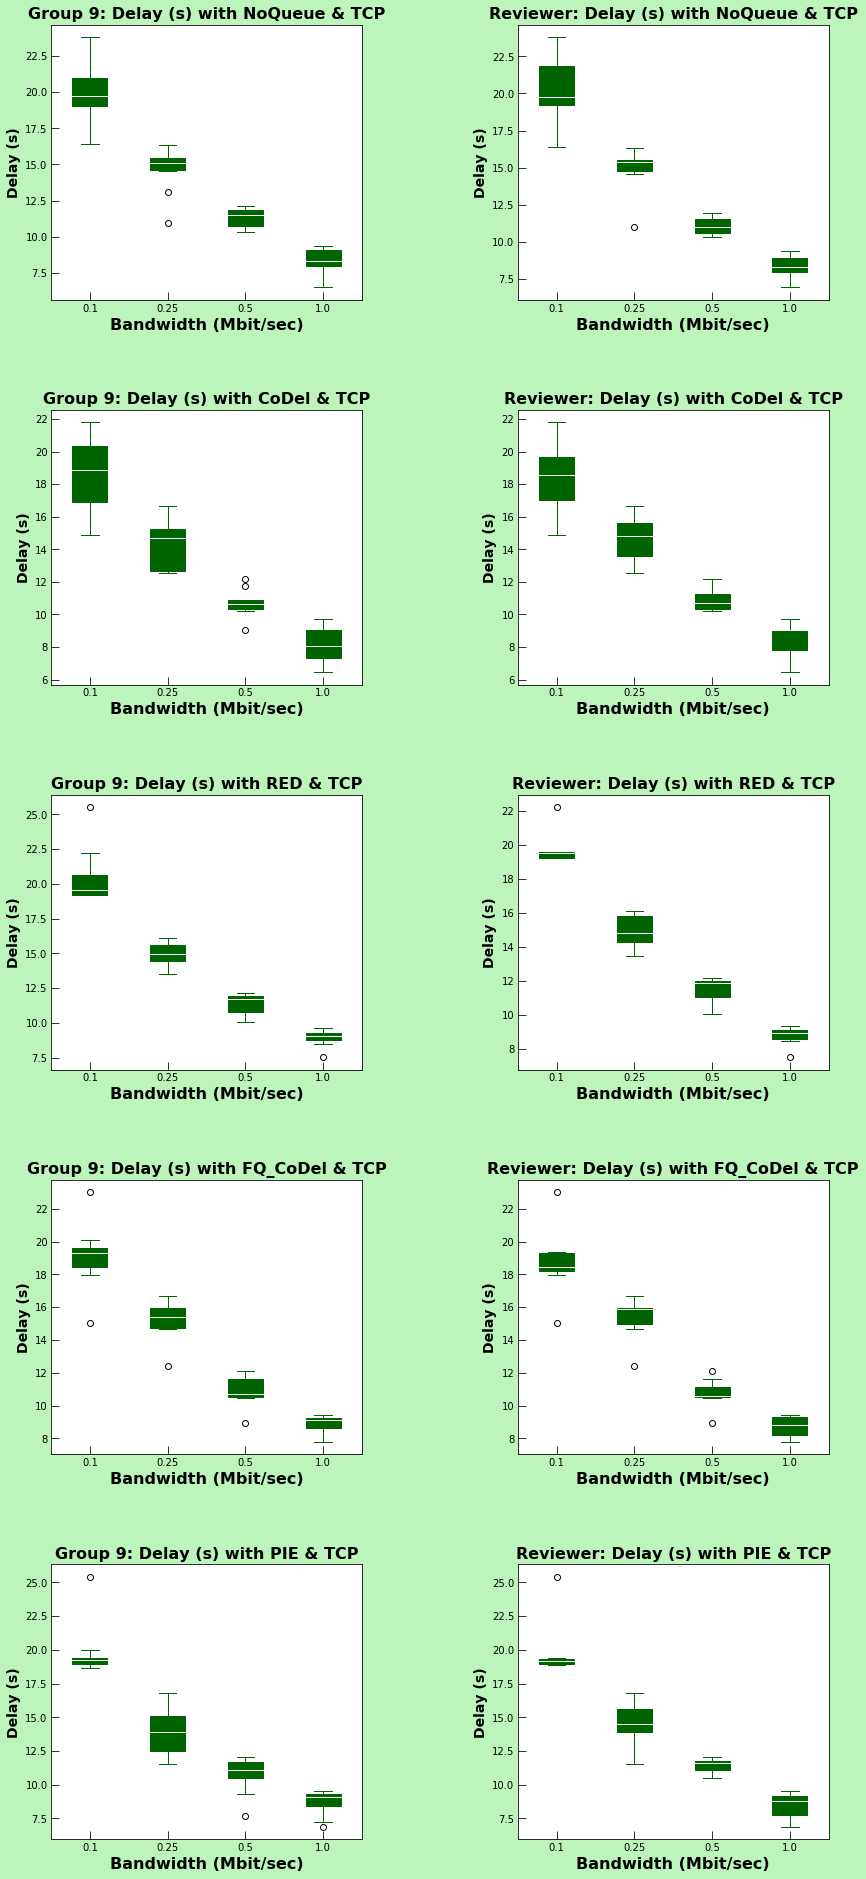

In [17]:
plot_data(var_types[0], transport_types[0], all_data_tcp_delay, reviewer_data_tcp_delay)

## TCP-Linkutil Plots

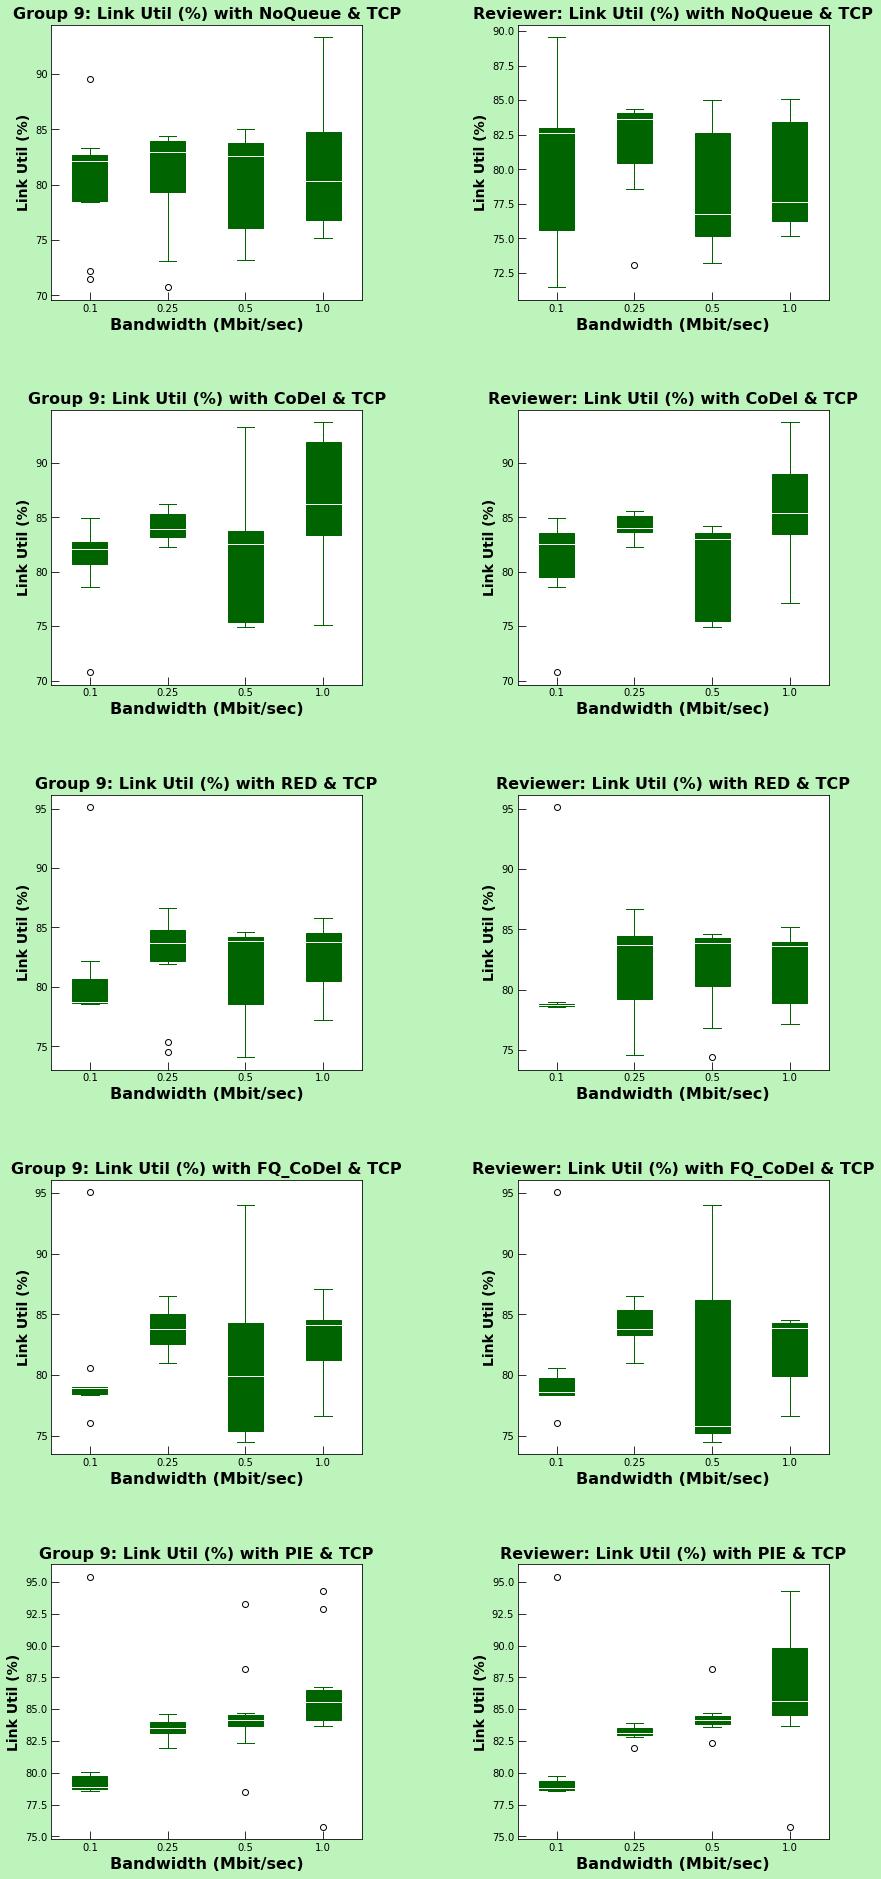

In [18]:
plot_data(var_types[1], transport_types[0], all_data_tcp_linkutil, reviewer_data_tcp_linkutil)

# UDP Section
These plots will show that there's not a lot of variance in the link utilization data to magnify the effects of the different AQM implementations, but here are the UDP comparisons for your review.

### Get Group 9 and Reviewer UDP Data

In [19]:
all_data_udp_delay = split_data(all_delay_data_noqueue_udp, all_delay_data_codel_udp,
                                     all_delay_data_red_udp, all_delay_data_fq_codel_udp,
                                     all_delay_data_pie_udp, group9_trials)

all_data_udp_linkutil = split_data(all_linkutil_data_noqueue_udp, all_linkutil_data_codel_udp,
                                     all_linkutil_data_red_udp, all_linkutil_data_fq_codel_udp,
                                     all_linkutil_data_pie_udp, group9_trials)

In [20]:
reviewer_data_udp_delay = split_data(reviewer_delay_data_noqueue_udp, reviewer_delay_data_codel_udp,
                                     reviewer_delay_data_red_udp, reviewer_delay_data_fq_codel_udp,
                                     reviewer_delay_data_pie_udp, reviewer_trials)

reviewer_data_udp_linkutil = split_data(reviewer_linkutil_data_noqueue_udp, reviewer_linkutil_data_codel_udp,
                                     reviewer_linkutil_data_red_udp, reviewer_linkutil_data_fq_codel_udp,
                                     reviewer_linkutil_data_pie_udp, reviewer_trials)

## UDP-Delay Plots

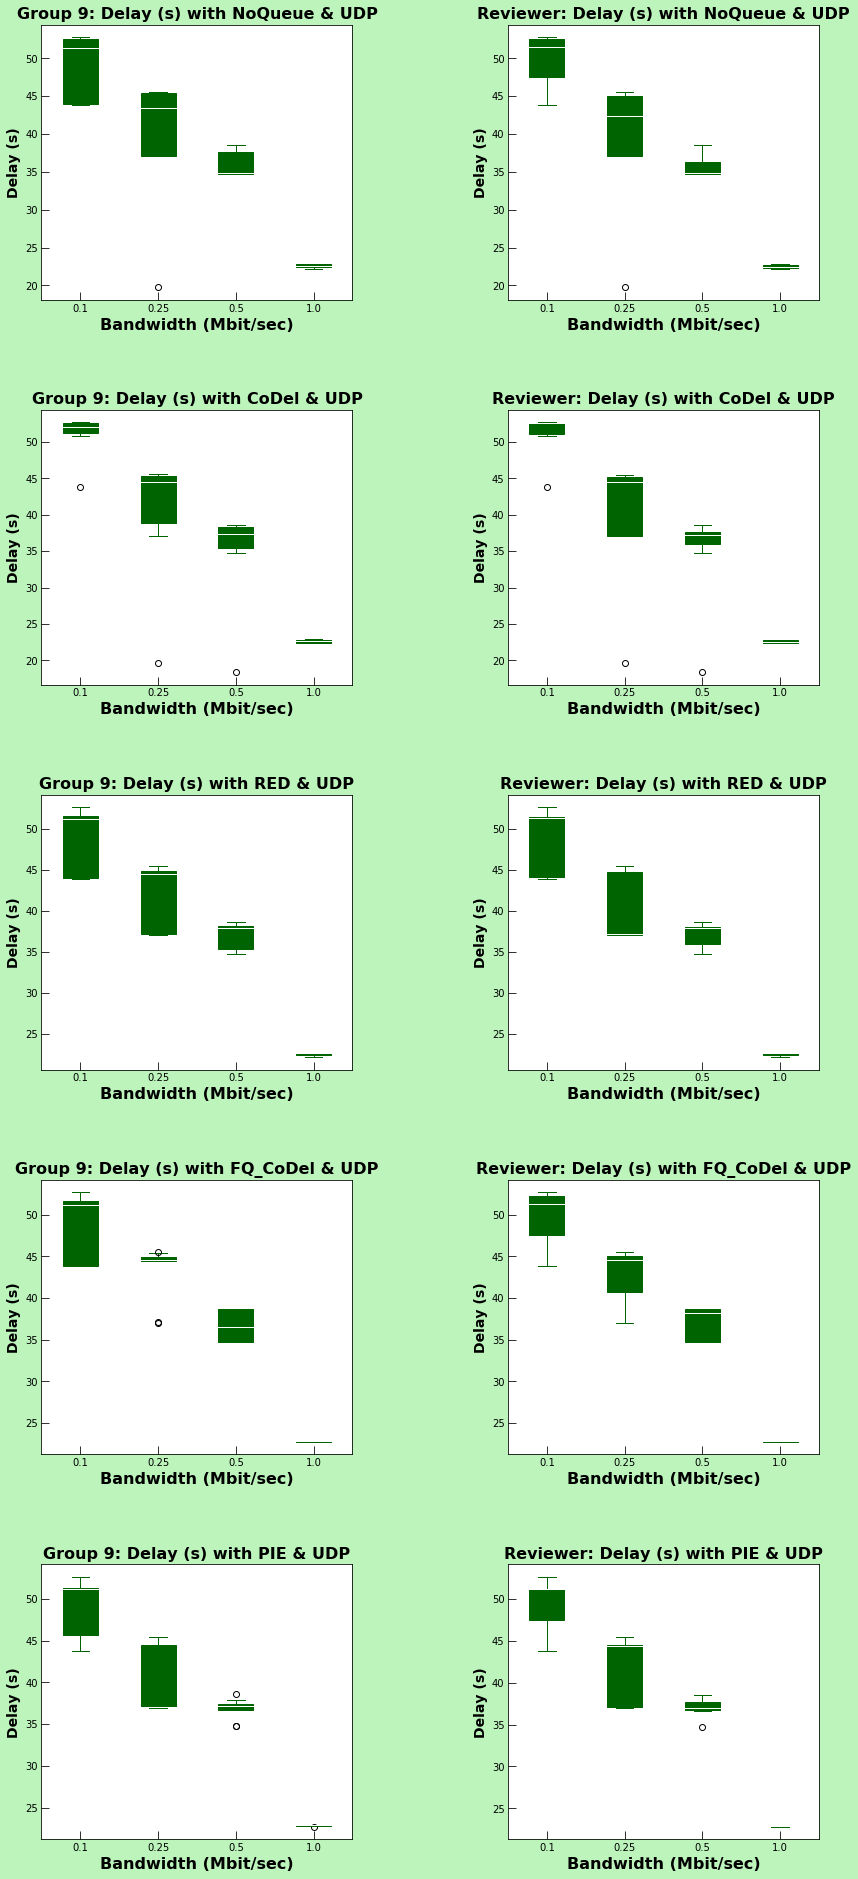

In [21]:
plot_data(var_types[0], transport_types[1], all_data_udp_delay, reviewer_data_udp_delay)

## UDP-Linkutil Plots

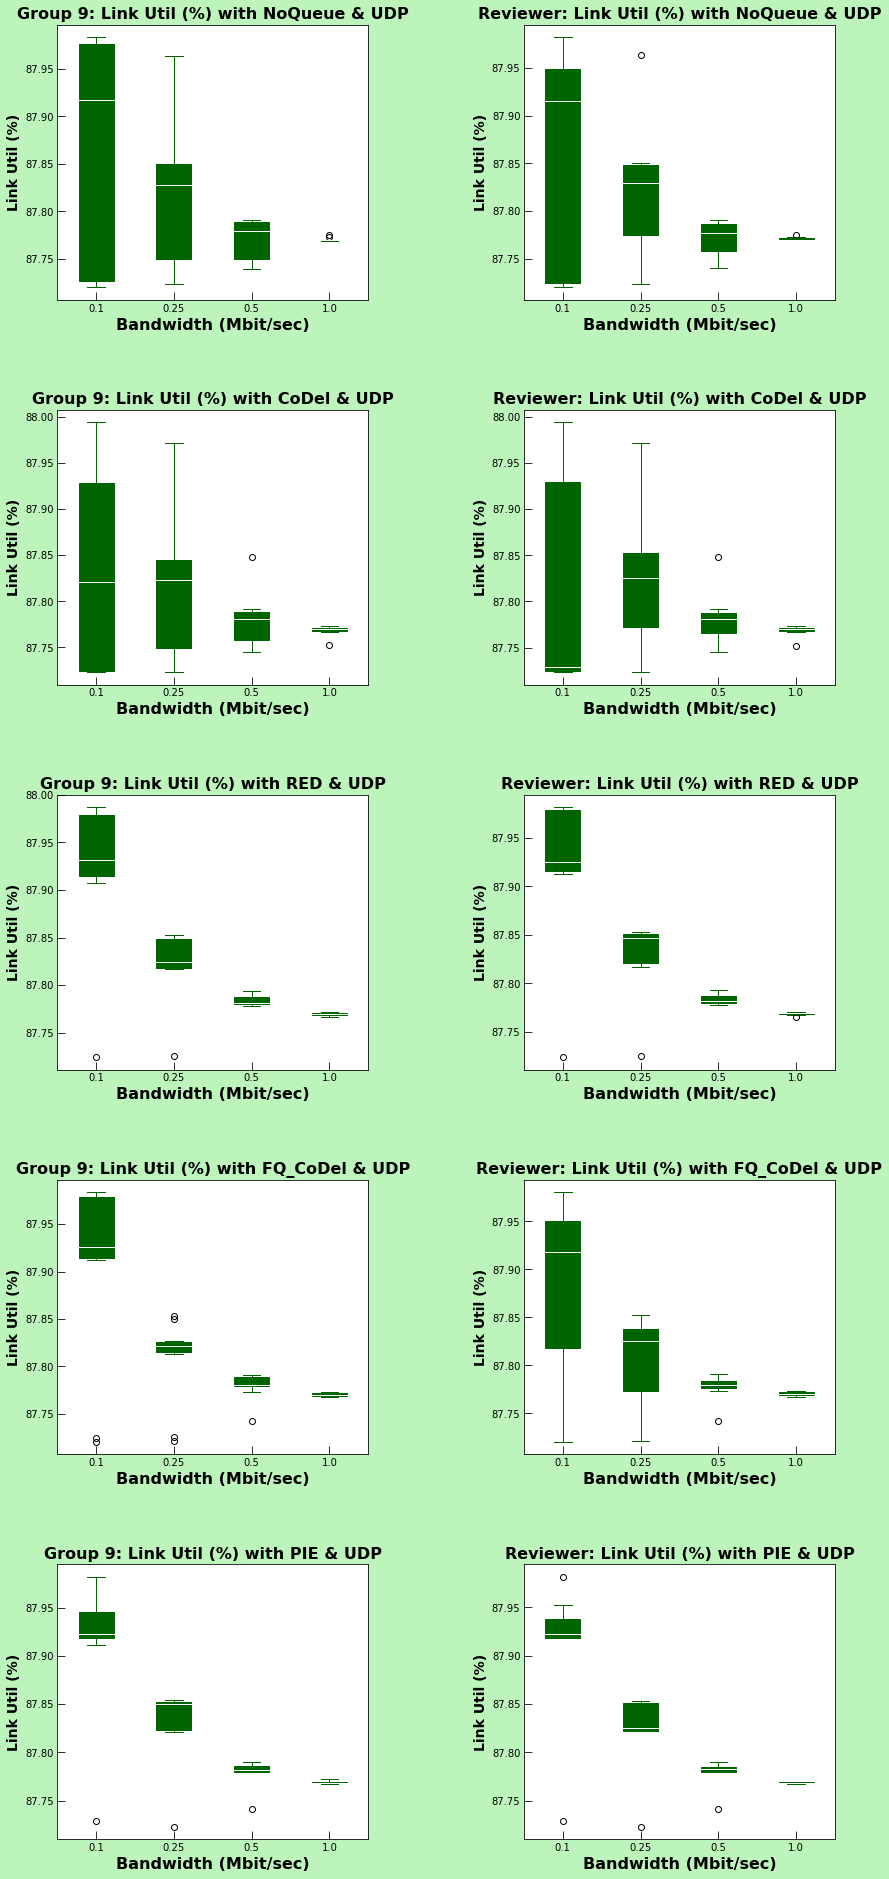

In [22]:
plot_data(var_types[1], transport_types[1], all_data_udp_linkutil, reviewer_data_udp_linkutil)

# Thanks for reviewing!